# ASSIGNMENT - 4

### Problem Statement
Recurrent neural network (RNN) - Use the Google stock prices dataset and design a time
series analysis and prediction system using RNN.

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.models import load_model

In [4]:
import pandas as pd

# Load dataset
dataset = pd.read_csv("Google_Stock_Price_Train.csv")


In [5]:
# Extract 'Open' prices
training_set = dataset.iloc[:, 1:2].values

In [7]:
from sklearn.preprocessing import MinMaxScaler  # ensure MinMaxScaler is imported
# Feature Scaling
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [9]:
import numpy as np
# Create training data structure
X_train, y_train = [], []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [13]:
from tensorflow.keras.models import Sequential  # ensure Sequential is imported
from tensorflow.keras.layers import LSTM, Dropout, Dense
# Build RNN model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=1)
])

In [14]:
# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 49s 368ms/step - loss: 0.0560 - val_loss: 0.0088
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 267ms/step - loss: 0.0040 - val_loss: 0.0036
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 290ms/step - loss: 0.0031 - val_loss: 0.0047
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 318ms/step - loss: 0.0032 - val_loss: 0.0051
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 284ms/step - loss: 0.0028 - val_loss: 0.0048
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 315ms/step - loss: 0.0032 - val_loss: 0.0072
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 265ms/step - loss: 0.0032 - val_loss: 0.0052
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 296ms/step - loss: 0.0025 - val_loss: 0.0037
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 299ms/step - loss: 0.0026 - val_loss: 0.0037
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 320ms/step - loss: 0.0026 - val_loss: 0.0050
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 296ms/step - loss: 0.0029 - val_loss: 0.0034
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 11

In [15]:
# Save the model
model.save("rnn_google_stock.h5")

In [18]:
import pandas as pd
from tensorflow.keras.models import load_model  # added import for load_model

# Load the model for evaluation
model = load_model("rnn_google_stock.h5")

In [26]:
# Load test data for prediction
dataset_test = pd.read_csv('Google_Stock_Price_Train_mam.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [27]:
# Prepare test inputs
total_dataset = pd.concat((dataset['Open'], dataset_test['Open']), axis=0)
inputs = total_dataset[len(total_dataset) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

In [28]:
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [29]:
# Predict stock prices
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 190ms/step


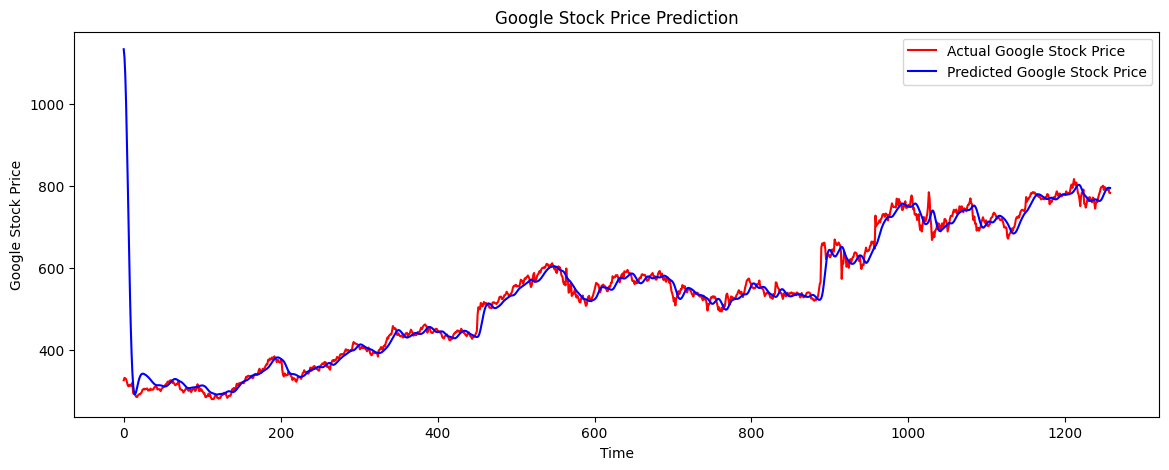

In [31]:
import matplotlib.pyplot as plt
# Plot the results
plt.figure(figsize=(14, 5))
plt.plot(real_stock_price, color='red', label='Actual Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


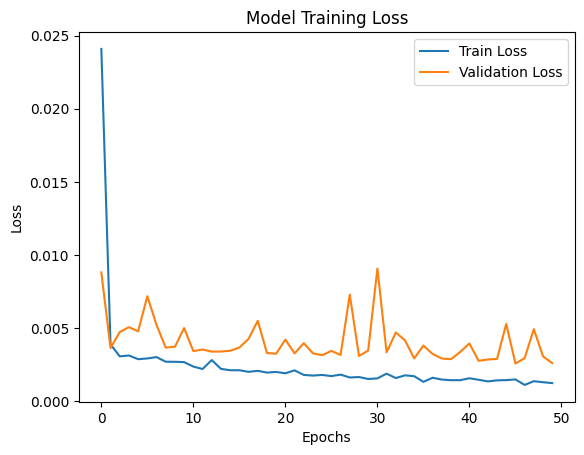

In [32]:
# Plot training loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
